In [1]:
import os
import subprocess
import pandas as pd

In [2]:
data_path = './data/'
data_list = [data_path + s for s in os.listdir(data_path)]
data_list

['./data/data004',
 './data/data005',
 './data/data003',
 './data/data002',
 './data/data001']

In [3]:
raw_data = {'Cache_Size': [], 'TWO_Q 20': [], 'TWO_Q 30': [], 'TWO_Q 40': []}

cache_ratio = 20
data = data_list[1]

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['Cache_Size'].append(cache_size)
    raw_data['TWO_Q 20'].append(float(ratio[4]))

cache_ratio = 30

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['TWO_Q 30'].append(float(ratio[4]))

cache_ratio = 40

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['TWO_Q 40'].append(float(ratio[4]))

In [4]:
# ratio 20
df_hitRatio = pd.DataFrame.from_dict(raw_data)
df_hitRatio = df_hitRatio.set_index('Cache_Size')
df_hitRatio

,TWO_Q 20,TWO_Q 30,TWO_Q 40
Cache_Size,,,
100,40.8,42.6,43.1
200,45.9,46.1,46.0
300,48.1,48.9,49.1
400,49.5,50.2,50.4
500,50.3,51.0,51.2
600,51.0,51.5,51.7
700,51.4,51.9,52.1
800,51.8,52.2,52.4
900,52.2,52.5,52.6


<AxesSubplot:xlabel='Cache_Size'>

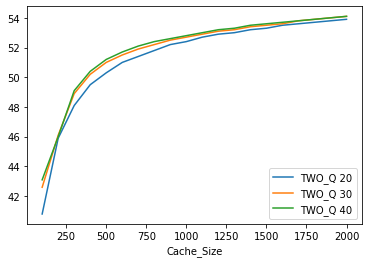

In [5]:
#data4
df_hitRatio.plot()